# Integration of lokta volterra model using Gillespie's direct method

$$
\frac{dX}{dt} = aX - \beta XY
$$
$$
\frac{dY}{dt} = \beta XY - \mu Y
$$

The system can be represented as a stoichiometric matrix, $\mathbf{S}$, and propensity vector, $\mathbf{p}$

$$
\mathbf{S} = 
\begin{bmatrix}
    1  &  0  \\
    -1  & 1  \\
    0  &  1 
\end{bmatrix}
$$

$$
\mathbf{p} = (aX, \beta XY, \mu Y)
$$


For more details see [Gillespie Algorithm](https://en.wikipedia.org/wiki/Gillespie_algorithm)

## Stochastic integration of 100 trajectories 

In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pl

import tensorsim as ts

%matplotlib inline

n_reps = 100
X_t0, Y_t0 = 300., 300.
a, B, mu = 0.1, 0.0005, 0.2

with tf.Graph().as_default():

    # initial conditions
    ics = tf.constant([[X_t0]*n_reps, [Y_t0]*n_reps])

    # simulation parameters
    theta = tf.constant([[a],[B],[mu]])

    #stoichiometric matrix
    S = tf.constant([
        [ 1., 0.],
        [-1., 1.],
        [ 0.,-1.]
    ])

    #hazard function a.k.a propensity vector
    def h_fn(X, Y, a, B, mu):
        return [a*X, B*X*Y, mu*Y]

    Y = ts.integrate.mjp(ics, theta, S, h_fn, n_jumps=30000)

    with tf.Session() as sess:
        # t@(n_jumps, n_reps), Z@(n_jumps, n_var, n_reps)
        t, Z = sess.run(Y)

## Visualise trajectories 

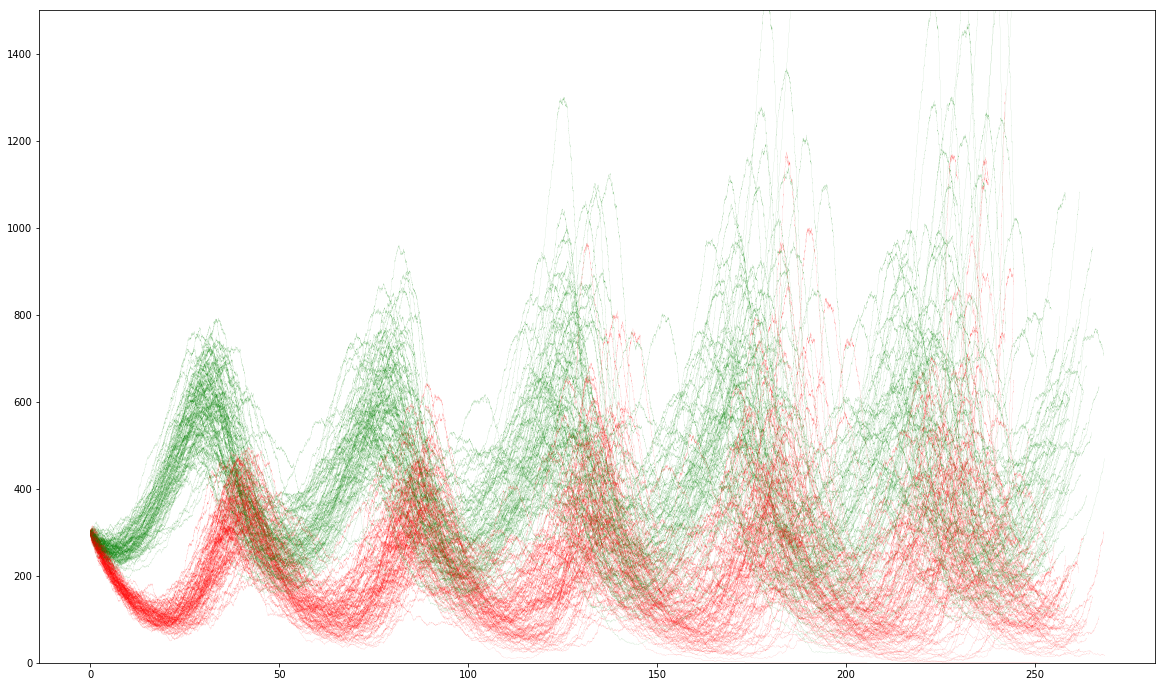

In [14]:
fig = pl.figure(figsize=(20,12))
for q in range(n_reps):
    pl.plot(t[:,q], Z[:,0,q], "g-", t[:,q], Z[:,1,q], "r-", linewidth=0.05)
_ = pl.ylim((0,1500))

# Quantize trajectories to be discrete in time

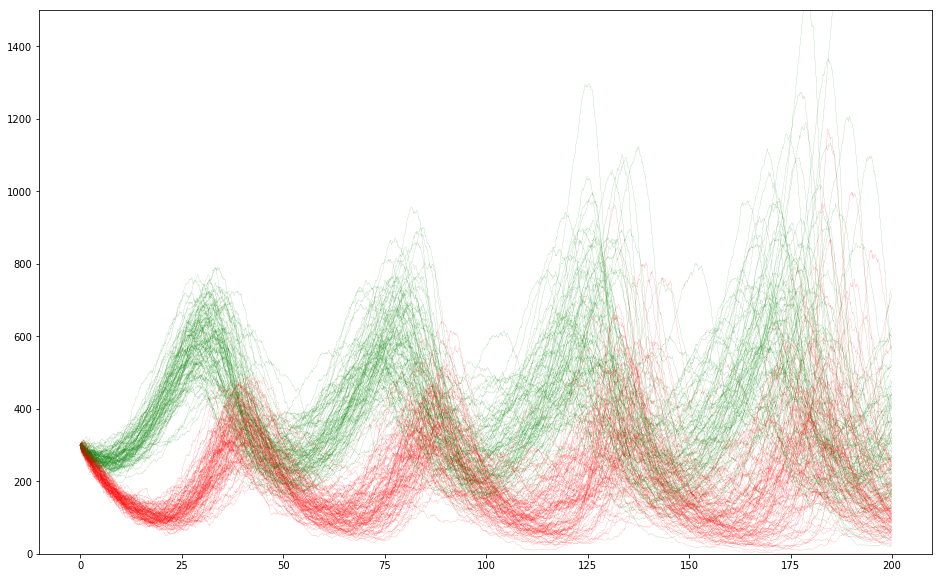

In [17]:
t_, Z_ = ts.utils.quantize(t, Z, np.arange(0, 200, 0.1))

fig = pl.figure(figsize=(16,10))
for q in range(n_reps):
    pl.plot(t_, Z_[q,:,0], "g-", t_, Z_[q,:,1], "r-", linewidth=0.1)
_ = pl.ylim((0,1500))